# Data QA and Cleaning
Before we can do any meaningful analysis of any data, we need to make sure that it is the ata that we need and take care of any "bad" data that could be problematic. Some common things that we're looking for in data Quality Assurance (QA) are:
* Consistent data types
* Missing and N/A values
* Unreasonable outliers/values
* Duplicates

In [1]:
# import necessary libraries
import pandas as pd # for data frames, reading and writing data
from matplotlib import pyplot as plt
import numpy as np

# the next line is so that the matplot lib plots show up in the notebook cell
%matplotlib inline

## Load Data
Let's use the same sample data that we used before in the Pandas section. We'll load the user data, since that has the most fields and potential for "dirty" data.

In [2]:
filename = 'sample_data.xlsx'
user_df = pd.read_excel(filename, sheet_name='user_data')
user_df.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,favourites_count,description,geo_enabled,...,statuses_count,time_zone,created_at,verified,utc_offset,contributors_enabled,listed_count,protected,url,state
0,8192222,8192222,Jezebel,Jezebel,NaN,318516,29,94,All the news you need. Without airbrushing.,0,...,81056,Eastern Time (US & Canada),2007-08-14 22:57:34,1,-14400.0,0,6709,0,http://jezebel.com,NaN
1,11801852,11801852,Jenna Hatfield,JennaHatfield,Cambridge OH,10024,6808,21156,Award winning writer. Editor. Wife. Mom. Dog l...,0,...,106425,Eastern Time (US & Canada),2008-01-03 15:51:49,0,-14400.0,0,577,0,http://stopdropandblog.com,Ohio
2,12366342,12366342,King County Library,KCLS,King County WA,10442,235,4417,King County Library System (KCLS) is your comm...,1,...,17786,Pacific Time (US & Canada),2008-01-17 17:51:28,0,-28800.0,0,548,0,http://www.kcls.org,Washington
3,14362996,14362996,Alanna Banks,fridaysoffshop,Toronto,765,850,32,Shop Owner at fridaysoff.ca an online source o...,0,...,1946,Quito,2008-04-11 17:49:07,0,-18000.0,0,48,0,http://fridaysoff.ca,NaN
4,15430687,15430687,C.B. Cebulski,CBCebulski,Shanghai China,55961,869,11642,Just a guy lucky enough to work for Marvel. Tr...,0,...,22157,Eastern Time (US & Canada),2008-07-14 19:04:35,1,-14400.0,0,1889,0,http://www.eataku.tumblr.com,NaN


In [3]:
user_df.describe(include='all')

,id,id_str,name,screen_name,location,followers_count,friends_count,favourites_count,description,geo_enabled,...,statuses_count,time_zone,created_at,verified,utc_offset,contributors_enabled,listed_count,protected,url,state
count,7.240000e+02,7.240000e+02,708,724,537,724.000000,724.000000,724.000000,633,724.000000,...,724.000000,130,724,724.000000,130.000000,724.0,724.000000,724.0,266,202
unique,NaN,NaN,689,724,468,NaN,NaN,NaN,633,NaN,...,NaN,29,724,NaN,NaN,NaN,NaN,NaN,265,41
top,NaN,NaN,,sontahjaye_,United States,NaN,NaN,NaN,PSU Alum Philly Makeup Artist & Beauty E...,NaN,...,NaN,Pacific Time (US & Canada),2011-09-23 02:18:45,NaN,NaN,NaN,NaN,NaN,http://www.elawoman.com,Texas
freq,NaN,NaN,7,1,9,NaN,NaN,NaN,1,NaN,...,NaN,27,1,NaN,NaN,NaN,NaN,NaN,2,26
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2007-08-14 22:57:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2018-08-05 13:05:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.210904e+17,2.210904e+17,NaN,NaN,NaN,3227.995856,843.104972,13307.718232,NaN,0.535912,...,26372.118785,NaN,NaN,0.019337,-15036.923077,0.0,47.067680,0.0,NaN,NaN
std,3.846500e+17,3.846500e+17,NaN,NaN,NaN,20018.968071,2324.828154,29736.467653,NaN,0.499053,...,49248.931311,NaN,NaN,0.137802,16164.863506,0.0,310.573987,0.0,NaN,NaN
min,8.192222e+06,8.192222e+06,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,...,1.000000,NaN,NaN,0.000000,-36000.000000,0.0,0.000000,0.0,NaN,NaN
25%,3.095991e+08,3.095991e+08,NaN,NaN,NaN,153.500000,169.500000,702.250000,NaN,0.000000,...,1800.250000,NaN,NaN,0.000000,-25200.000000,0.0,0.000000,0.0,NaN,NaN


## NA Columns
Since the describe function doesn't give us the count of NA values, we can easily get that with a call to the ".isna()" function and then sum those results:

In [4]:
user_df.isna().sum()

id                        0
id_str                    0
name                     16
screen_name               0
location                187
followers_count           0
friends_count             0
favourites_count          0
description              91
geo_enabled               0
lang                      0
statuses_count            0
time_zone               594
created_at                0
verified                  0
utc_offset              594
contributors_enabled      0
listed_count              0
protected                 0
url                     458
state                   522
dtype: int64

Let's say we wanted to create a model using the text from `description` as the inputs to the model, we'd want to drop all of the records with NA descriptions. We may also want to drop any descriptions with a length shorter than n-words.

Let's create a subset that has descriptions with more than 2 words.

In [5]:
# Add a column with the description word-count (we'll use list comprehension for that)
user_df['desc_len'] = [len(str(x).split()) for x in user_df['description']]

# Filter the data set to those descriptions with non-NA and length >2.
user_sub = user_df.loc[(~user_df['description'].isna()) & (user_df.desc_len>2)]
len(user_sub)

557

In [6]:
user_sub['description'].head()

0          All the news you need. Without airbrushing.
1    Award winning writer. Editor. Wife. Mom. Dog l...
2    King County Library System (KCLS) is your comm...
3    Shop Owner at fridaysoff.ca an online source o...
4    Just a guy lucky enough to work for Marvel. Tr...
Name: description, dtype: object

## Data Types
Sometimes imported data doesn't arrive as the data type that you need. Most often this happens with dates, but sometimes numbers come in as strings too, causing problems. 

Use the `dtypes` method on a pandas dataframe to get the list of data types.

In [7]:
user_sub.dtypes

id                               int64
id_str                           int64
name                            object
screen_name                     object
location                        object
followers_count                  int64
friends_count                    int64
favourites_count                 int64
description                     object
geo_enabled                      int64
lang                            object
statuses_count                   int64
time_zone                       object
created_at              datetime64[ns]
verified                         int64
utc_offset                     float64
contributors_enabled             int64
listed_count                     int64
protected                        int64
url                             object
state                           object
desc_len                         int64
dtype: object

Looks like the created_at date came in as a date, so no need to change it. Let's create a string version of that variable and then convert it back...

We can use the .astype() function to convert an entire pandas.Series to a different type.

In [8]:
user_sub['created_at_str'] = user_sub['created_at'].astype(str)

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
user_sub.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,favourites_count,description,geo_enabled,...,created_at,verified,utc_offset,contributors_enabled,listed_count,protected,url,state,desc_len,created_at_str
0,8192222,8192222,Jezebel,Jezebel,NaN,318516,29,94,All the news you need. Without airbrushing.,0,...,2007-08-14 22:57:34,1,-14400.0,0,6709,0,http://jezebel.com,NaN,7,2007-08-14 22:57:34
1,11801852,11801852,Jenna Hatfield,JennaHatfield,Cambridge OH,10024,6808,21156,Award winning writer. Editor. Wife. Mom. Dog l...,0,...,2008-01-03 15:51:49,0,-14400.0,0,577,0,http://stopdropandblog.com,Ohio,16,2008-01-03 15:51:49
2,12366342,12366342,King County Library,KCLS,King County WA,10442,235,4417,King County Library System (KCLS) is your comm...,1,...,2008-01-17 17:51:28,0,-28800.0,0,548,0,http://www.kcls.org,Washington,13,2008-01-17 17:51:28
3,14362996,14362996,Alanna Banks,fridaysoffshop,Toronto,765,850,32,Shop Owner at fridaysoff.ca an online source o...,0,...,2008-04-11 17:49:07,0,-18000.0,0,48,0,http://fridaysoff.ca,NaN,22,2008-04-11 17:49:07
4,15430687,15430687,C.B. Cebulski,CBCebulski,Shanghai China,55961,869,11642,Just a guy lucky enough to work for Marvel. Tr...,0,...,2008-07-14 19:04:35,1,-14400.0,0,1889,0,http://www.eataku.tumblr.com,NaN,15,2008-07-14 19:04:35


Assuming we got this data with the created_at_str date as a string and we want to create a date-only column.

In [10]:
converted_dates = pd.to_datetime(user_sub.created_at_str, format='%Y-%m-%d')

# Test to see if the convertion matches the original data:
converted_dates.equals(user_sub['created_at'])   

True

In [11]:
# Make a date only column
user_sub.loc[:, 'created_date'] = user_sub['created_at'].dt.date
user_sub.loc[:, 'created_month'] = user_sub['created_at'].dt.month

C:\Users\tttri\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\tttri\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Quick EDA
Pandas has connected to some of the more basic MatPlotLib plotting functionalit
y. This makes it easier to create quick plots of dataframe data. With our new created_date, let's create a quick historgram to see how many tweets are created/day.


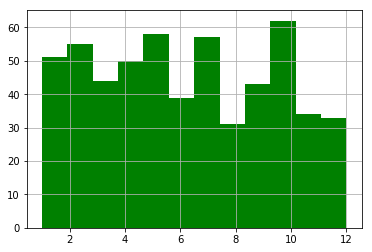

In [12]:
user_sub['created_month'].hist(bins=12, color='g')

In [13]:
user_sub['created_month'].value_counts()

10    62
5     58
7     57
2     55
1     51
4     50
3     44
9     43
6     39
11    34
12    33
8     31
Name: created_month, dtype: int64

## Merging and Appending Data
We covered merging and appending data in the Pandas notebook. Here are some stumbling blocks that I've run into when trying to merge data and ways around them:
1. Data types - if the column data types don't match, Pandas won't merge the data. Sometimes even when you call the `.astype()` on a column, say to convert it from float to int, it won't work if there is a non-integer value in there.
    Solution - wrestle with both data frames until you can get the datatypes to match. I've had to keep integer fields as floats, or change dates to strings in order for a merge to work.
1. Date-data - there are a few different data types (pandas.datetime, regular datetime, others?) they have to match for a merge to work.
1. Indices - if you are just appending data, you may need to add `ignore_index=True` for the append to work, especially if there are matching indices in the two data frames.
1. Extra columns - these automatically get added when you append two data frames, with the resulting data frame having all of the columns existing in both.
1. Column order - this seems to get messed up sometimes when you append or merge data frames. It's easy to fix by simply redefining the data set by passing in the list of columns in the order that you need them.

## Imputing Missing Values
There are many different options when looking to fill in missing values. Some common methods:
1. Drop the data
1. Fill with zeros
1. Fill with the population mean
1. Fill with a grouped mean (mean of a subset that each missing data point belongs to)

All of these can be handled by subsetting the data frames and applying the logic that you want to fill the variable. 

We've already shown how to drop the data above when we dropped rows that had insufficient data in the `description` column for our analysis.

To create some examples, let's create some holes in the user data that we've been working with.

In [14]:
# Take a random sample from the data and set the values to na
sample_idx = user_df.sample(n=40, random_state=24).index 
user_df.loc[sample_idx, ['followers_count', 'friends_count', 'favourites_count']] = np.nan

In [16]:
# Use the function from earlier to check our new NA counts
user_df[['followers_count', 'friends_count', 'favourites_count']].isna().sum()

followers_count     40
friends_count       40
favourites_count    40
dtype: int64

### 1. Fill values with 0

In [17]:
user_df.loc[user_df.followers_count.isna(), 'followers_count'] = 0

### 2. Fill values with population mean

In [18]:
user_df.loc[user_df.friends_count.isna(), 'friends_count'] = user_df.friends_count.mean()

### 3. Fill values with grouped mean
This one is a little tougher, since we have to calculate means for each group. We can create a grouped data frame to get those means, then merge them to update the NA values. Let's use `time_zone` as our grouping variable and populatet the `favourites_count` with the average within the time-zone.

In [ ]:
tz_means = user_df[['time_zone','favourites_count']].groupby('time_zone', as_index=False).agg('mean') 
# rename the mean column to avoid a conflict when updating
tz_means.columns = ['time_zone','favourites_mean']
tz_means.head()

In [ ]:
user_df_merged = user_df.merge(tz_means, on='time_zone', how='left')
user_df_merged.head()

In [ ]:
# Update the missing friends_counts with the new friends_mean:
user_df_merged.loc[user_df.favourites_count.isna(), 'favourites_count'] = user_df_merged.loc[user_df.favourites_count.isna(), 'favourites_mean']

### Check the Data

In [ ]:
user_df_merged.loc[sample_idx, ['time_zone', 'favorites_mean', 'followers_count', 'friends_count', 'favourites_count']]

Well - it looks like a lot of our time-zones are missing! Let's create a place holder for that one and re-do the average by time zone, lumping all the unknown timezones into one.

In [ ]:
# set the missing time-zone values to 'missing'
user_df.loc[user_df.time_zone.isna(), 'time_zone'] = 'missing'

# recalculate the group averages to get the 'missing' group average
tz_means = user_df[['time_zone','favourites_count']].groupby('time_zone', as_index=False).agg('mean') 
tz_means.columns = ['time_zone','favourites_mean']

# #Merge the user data with the new time_zone means
user_df_merged = user_df.merge(tz_means, on='time_zone', how='left')

# # Set the values of the missing favourites_count to the group-means
user_df_merged.loc[user_df.favourites_count.isna(), 'favourites_count'] = user_df_merged.loc[user_df.favourites_count.isna(), 'favourites_mean']

# # Check the data
user_df_merged.loc[sample_idx, ['time_zone', 'favourites_mean', 'followers_count', 'friends_count', 'favourites_count']]

In [ ]:
user_df_merged.columns